In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('loldata_all.csv')

In [4]:
df.head()

,date,popularity,winrate,banrate,name,release,changes
0,1.394525e+09,4.17,50.20,0.34,aatrox,1.370045e+09,nochange
1,1.394525e+09,4.46,48.71,0.15,ryze,1.233446e+09,nochange
2,1.394525e+09,5.26,50.66,0.10,sejuani,1.325376e+09,nochange
3,1.394525e+09,4.52,48.77,0.31,diana,1.343779e+09,buff
4,1.394525e+09,4.69,48.37,0.19,shaco,1.254355e+09,nochange


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16636 entries, 0 to 16882
Data columns (total 7 columns):
date          16636 non-null float64
popularity    16636 non-null float64
winrate       16636 non-null float64
banrate       16636 non-null float64
name          16636 non-null object
release       16636 non-null float64
changes       16636 non-null object
dtypes: float64(5), object(2)
memory usage: 1.0+ MB


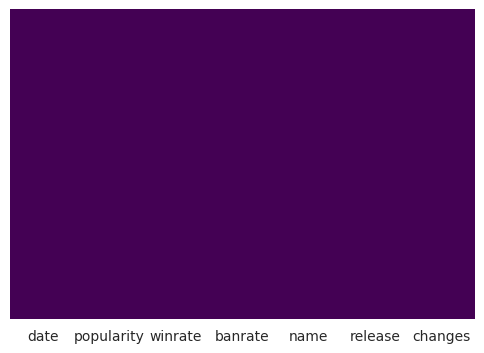

In [14]:
#Check NaNs
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
df.info()

# Remove NaN and 0 error

In [15]:
df.dropna(inplace=True)
df = df.drop(df[df['winrate']==0].index)

In [16]:
df.groupby('changes').count()

,date,popularity,winrate,banrate,name,release
changes,,,,,,
buff,669,669,669,669,669,669
nerf,589,589,589,589,589,589
nochange,15377,15377,15377,15377,15377,15377


In [17]:
df.groupby('changes').describe()

banrate          date    popularity       release  \
changes                                                                  
buff     count    669.000000  6.690000e+02    669.000000  6.690000e+02   
         mean       4.998191  1.440423e+09      7.209253  1.306280e+09   
         std       12.811181  2.491025e+07      6.267784  5.951343e+07   
         min        0.000000  1.394525e+09      0.710000  1.233446e+09   
         25%        0.130000  1.423854e+09      2.760000  1.251763e+09   
         50%        0.400000  1.440871e+09      5.170000  1.293840e+09   
         75%        2.740000  1.459267e+09      9.590000  1.343779e+09   
         max       88.770000  1.484078e+09     35.550000  1.475280e+09   
nerf     count    589.000000  5.890000e+02    589.000000  5.890000e+02   
         mean      14.255382  1.442780e+09     11.541426  1.311106e+09   
         std       18.283315  2.670008e+07      7.743483  6.571121e+07   
         min        0.000000  1.394525e+09      0.900000  1.233446e+09   
         25%        1.420000  1.418807e+09      6.660000  1.259626e+09   
         50%        6.190000  1.442253e+09      9.200000  1.296518e+09   
         75%       20.970000  1.466165e+09     13.880000  1.346458e+09   
         max       91.710000  1.484078e+09     48.650000  1.480550e+09   
nochange count  15377.000000  1.537700e+04  15377.000000  1.537700e+04   
         mean       4.395388  1.442118e+09      7.838019  1.295935e+09   
         std       10.474220  2.792505e+07      6.352188  5.377940e+07   
         min        0.000000  1.394525e+09      0.000000  1.233446e+09   
         25%        0.180000  1.416960e+09      3.360000  1.249085e+09   
         50%        0.640000  1.441487e+09      6.130000  1.285891e+09   
         75%        2.910000  1.466165e+09      9.960000  1.330560e+09   
         max       92.250000  1.484875e+09     44.420000  1.480550e+09   

                     winrate  
changes                       
buff     count    669.000000  
         mean      48.113019  
         std        2.848954  
         min       38.020000  
         25%       46.320000  
         50%       48.430000  
         75%       49.900000  
         max       57.170000  
nerf     count    589.000000  
         mean      50.579915  
         std        2.656548  
         min       39.380000  
         25%       48.890000  
         50%       50.620000  
         75%       52.470000  
         max       57.540000  
nochange count  15377.000000  
         mean      49.813940  
         std        2.231203  
         min       38.760000  
         25%       48.390000  
         50%       49.970000  
         75%       51.410000  
         max       58.470000

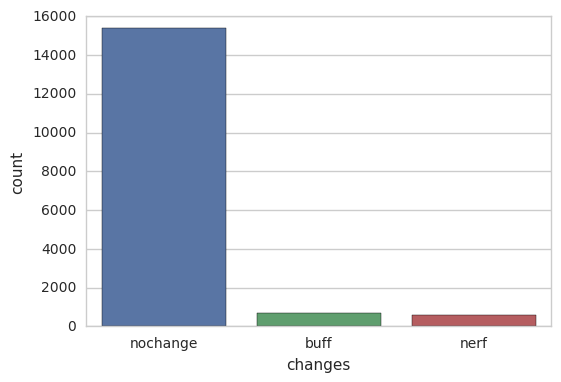

In [18]:
sns.set_style('whitegrid')
sns.countplot(x='changes',data=df, )

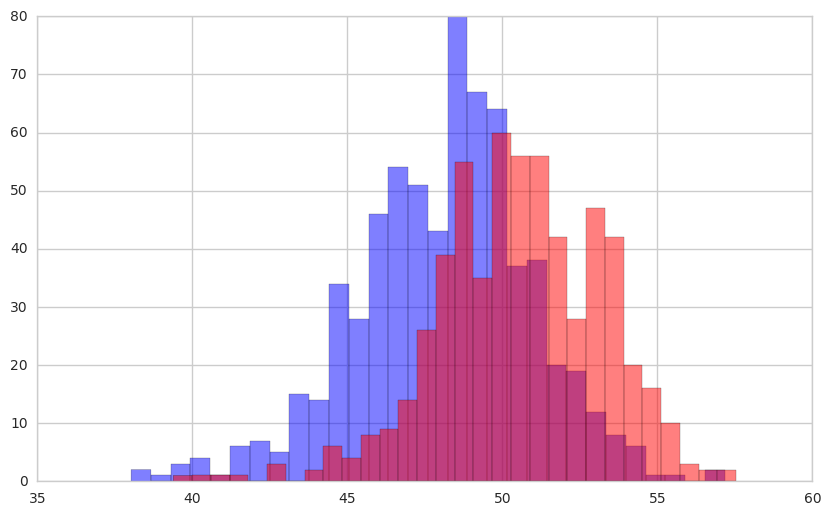

In [10]:
plt.figure(figsize=(10,6))
df[df['changes']=='buff']['winrate'].hist(alpha=0.5,color='blue',
                                              bins=30,label='buff')
df[df['changes']=='nerf']['winrate'].hist(alpha=0.5,color='red',
                                              bins=30,label='nerf')
# df[df['changes']=='nochange']['winrate'].hist(alpha=0.5,color='grey',
#                                               bins=50,label='nerf')

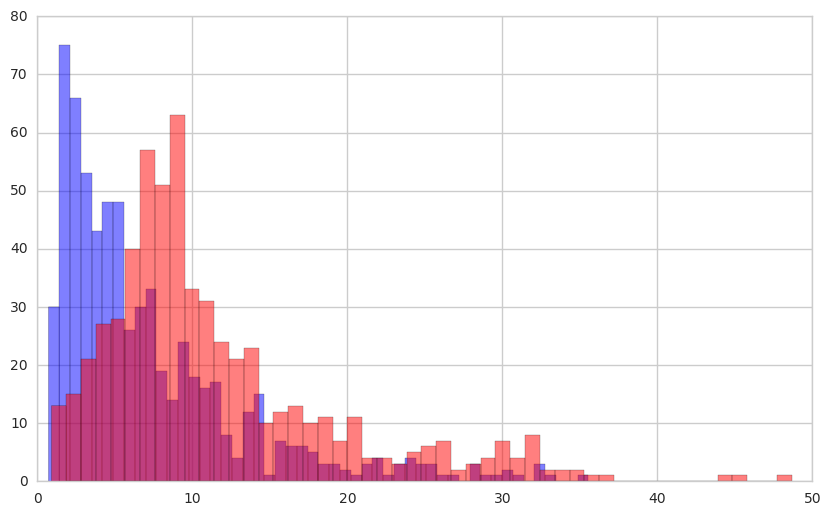

In [11]:
plt.figure(figsize=(10,6))
df[df['changes']=='buff']['popularity'].hist(alpha=0.5,color='blue',
                                              bins=50,label='buff')
df[df['changes']=='nerf']['popularity'].hist(alpha=0.5,color='red',
                                              bins=50,label='nerf')
# df[df['changes']=='nochange']['popularity'].hist(alpha=0.5,color='grey',
#                                               bins=50,label='nerf')

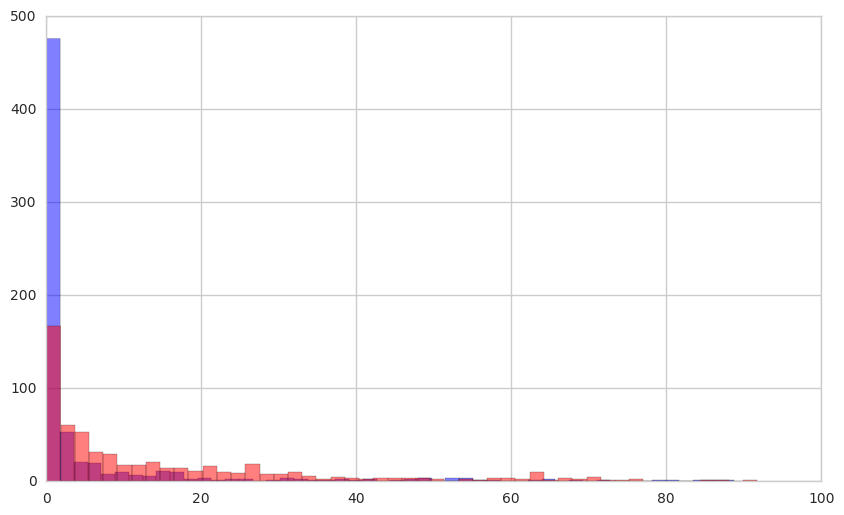

In [12]:
plt.figure(figsize=(10,6))
df[df['changes']=='buff']['banrate'].hist(alpha=0.5,color='blue',
                                              bins=50,label='buff')
df[df['changes']=='nerf']['banrate'].hist(alpha=0.5,color='red',
                                              bins=50,label='nerf')
# df[df['changes']=='nochange']['popularity'].hist(alpha=0.5,color='grey',
#                                               bins=50,label='nerf')

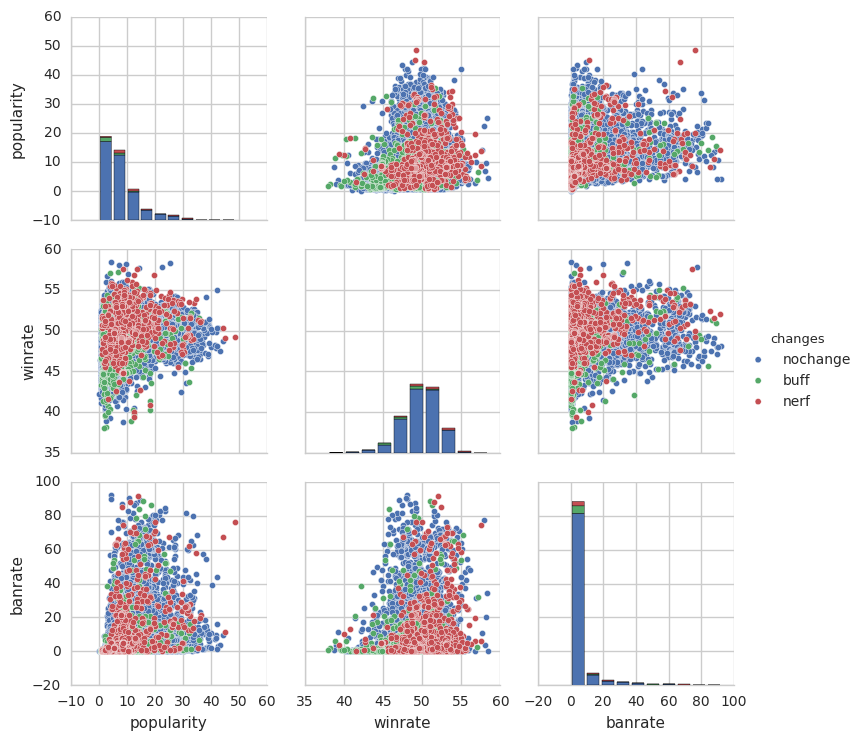

In [19]:
sns.pairplot(df[['popularity', 'winrate', 'banrate', 'changes']], hue="changes")

In [33]:
df.head()

,date,popularity,winrate,banrate,name,release,changes
0,1.394525e+09,4.17,50.20,0.34,aatrox,1.370045e+09,nochange
1,1.394525e+09,4.46,48.71,0.15,ryze,1.233446e+09,nochange
2,1.394525e+09,5.26,50.66,0.10,sejuani,1.325376e+09,nochange
3,1.394525e+09,4.52,48.77,0.31,diana,1.343779e+09,buff
4,1.394525e+09,4.69,48.37,0.19,shaco,1.254355e+09,nochange


# Split hold out set


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(df[['popularity', 'winrate', 'banrate']], 
                                                    df['changes'], test_size=0.25, 
                                                    random_state=42)

# Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
model_logreg = LogisticRegression(class_weight='balanced')
model_logreg.fit(X_train,y_train)

p = model_logreg.predict(X_test)


print(classification_report(y_test,p))

             precision    recall  f1-score   support

       buff       0.47      0.04      0.08       167
       nerf       0.14      0.09      0.11       153
   nochange       0.93      0.98      0.95      3839

avg / total       0.88      0.91      0.89      4159



# Decision Tree

In [69]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(class_weight='balanced')
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [71]:
predictions = dtree.predict(X_test)
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

       buff       0.12      0.13      0.13       167
       nerf       0.15      0.12      0.14       153
   nochange       0.93      0.93      0.93      3839

avg / total       0.87      0.87      0.87      4159



# Random forest

In [1]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10, class_weight='balanced')
rfc.fit(X_train,y_train)
p_rfc = rfc.predict(X_test)

NameError: name 'X_train' is not defined

In [19]:
print(classification_report(y_test, p_rfc))

             precision    recall  f1-score   support

       buff       0.24      0.05      0.09       167
       nerf       0.39      0.11      0.17       153
   nochange       0.93      0.99      0.96      3839

avg / total       0.88      0.92      0.89      4159



# SVM

In [16]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [18]:
p_svm = svm.predict(X_test)
print(classification_report(y_test, p_svm))

             precision    recall  f1-score   support

       buff       0.00      0.00      0.00       167
       nerf       0.43      0.02      0.04       153
   nochange       0.92      1.00      0.96      3839

avg / total       0.87      0.92      0.89      4159



/opt/conda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.fit(X_train,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, kernel=rbf, gamma=1 ......................................
[CV] ....... C=0.1, kernel=rbf, gamma=1, score=0.924537, total=   2.3s
[CV] C=0.1, kernel=rbf, gamma=1 ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s remaining:    0.0s


[CV] ....... C=0.1, kernel=rbf, gamma=1, score=0.924964, total=   2.3s
[CV] C=0.1, kernel=rbf, gamma=1 ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.1s remaining:    0.0s


[CV] ....... C=0.1, kernel=rbf, gamma=1, score=0.924964, total=   2.3s
[CV] C=0.1, kernel=rbf, gamma=0.1 ....................................
[CV] ..... C=0.1, kernel=rbf, gamma=0.1, score=0.924537, total=   1.1s
[CV] C=0.1, kernel=rbf, gamma=0.1 ....................................
[CV] ..... C=0.1, kernel=rbf, gamma=0.1, score=0.924964, total=   1.1s
[CV] C=0.1, kernel=rbf, gamma=0.1 ....................................
[CV] ..... C=0.1, kernel=rbf, gamma=0.1, score=0.924964, total=   1.1s
[CV] C=0.1, kernel=rbf, gamma=0.01 ...................................
[CV] .... C=0.1, kernel=rbf, gamma=0.01, score=0.924537, total=   0.7s
[CV] C=0.1, kernel=rbf, gamma=0.01 ...................................
[CV] .... C=0.1, kernel=rbf, gamma=0.01, score=0.924964, total=   0.7s
[CV] C=0.1, kernel=rbf, gamma=0.01 ...................................
[CV] .... C=0.1, kernel=rbf, gamma=0.01, score=0.924964, total=   0.7s
[CV] C=0.1, kernel=rbf, gamma=0.001 ..................................
[CV] .

In [ ]:
grid_predictions = grid.predict(X_test)
print(classification_report(y_test,grid_predictions))